In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
# false on reject means no signif
%matplotlib inline

2012 and 2014 editions of the European Social Survey  
All persons aged 15 and over resident within private households, regardless of their nationality, citizenship, language or legal status, in the participating countries.

- Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.  TukeyHSD
- Did people become happier from 2012 to 2014? Compute results for each country in the sample.  
- Who reported watching more TV in 2012, men or women?  TukeyHSD
- Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?  
- Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?  
- Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?  TukeyHSD

Citation of data: European Social Survey Cumulative File, ESS 1-7 (2016). Data file edition 1.0. NSD - Norwegian Centre for Research Data, Norway - Data Archive and distributor of ESS data for ESS REIC.

In [2]:
ess = pd.DataFrame()
ess = pd.read_csv('ESSdata_Thinkful.csv')
ess  # 8594 rows × 13 columns

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
5,CH,36.0,6,4.0,6.0,7.0,3.0,8.0,7.0,4.0,2.0,NaN,2.0
6,CH,40.0,6,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,41.0,6,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,51.0,6,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,53.0,6,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0


In [3]:
ess.cntry.unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

CH = Switzerland, CZ = Czech Rep, DE = Germany, ES = Spain, NO = Norway, SE = Sweden

In [4]:
ess = ess.dropna()  # 8147 rows × 13 columns
ess = ess.drop(['idno'], axis=1)  # 8147 rows × 12 columns

In [5]:
ess['year'] = ess['year'].map({6: 2012, 7: 2014})

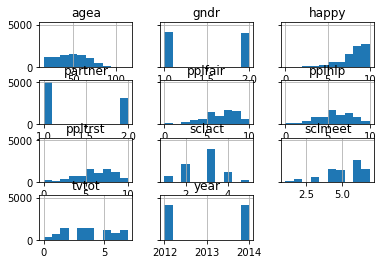

In [6]:
# Visualize our data.
ess.hist(sharey=True, sharex=False, )
plt.show()

In [7]:
twelve = [2012]
fourteen = [2014]

ess_12 = ess[ess['year'].isin(twelve)]
ess_14 = ess[ess['year'].isin(fourteen)]

ess_12

,cntry,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,2012,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,2012,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,2012,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,2012,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,2012,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0
6,CH,2012,3.0,0.0,5.0,2.0,0.0,2.0,2.0,1.0,76.0,1.0
7,CH,2012,2.0,4.0,5.0,3.0,10.0,5.0,2.0,2.0,30.0,1.0
8,CH,2012,2.0,8.0,8.0,8.0,9.0,6.0,4.0,2.0,84.0,2.0
9,CH,2012,4.0,4.0,4.0,8.0,7.0,4.0,2.0,2.0,62.0,1.0
10,CH,2012,1.0,6.0,7.0,7.0,9.0,5.0,2.0,2.0,33.0,1.0


## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

In [37]:
# Tukey HSD Test for ppltrst
years = np.asarray(ess['year'].tolist())
trustlvl = np.asarray(ess['ppltrst'].tolist())
tukey = pairwise_tukeyhsd(endog=trustlvl, groups=years, alpha=0.05) # alpha is the level of signif where reject
tukey.summary()

group1,group2,meandiff,lower,upper,reject
2012,2014,-0.0071,-0.1033,0.0892,False


In [9]:
# Tukey HSD Test for ppltrst
countries = np.asarray(ess['cntry'].tolist())
trustlvl = np.asarray(ess['ppltrst'].tolist())
tukey = pairwise_tukeyhsd(endog=trustlvl, groups=countries, alpha=0.05)
tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-1.346,-1.5768,-1.1151,True
CH,DE,-0.5032,-1.6582,0.6518,False
CH,ES,-0.6905,-0.8891,-0.492,True
CH,NO,0.8985,0.6774,1.1196,True
CH,SE,0.4165,0.2056,0.6274,True
CZ,DE,0.8428,-0.3146,2.0001,False
CZ,ES,0.6555,0.4439,0.867,True
CZ,NO,2.2445,2.0116,2.4773,True
CZ,SE,1.7625,1.5393,1.9857,True
DE,ES,-0.1873,-1.3386,0.964,False


In [35]:
print(stats.ttest_ind(ess['year'], ess['ppltrst']))

Ttest_indResult(statistic=90939.30795589279, pvalue=0.0)


In [11]:
# Printing the means for each group.
ess_t = ess.drop('agea', axis=1).groupby('year')
print(ess_t.mean())

         tvtot   ppltrst  pplfair    pplhlp     happy   sclmeet    sclact  \
year                                                                        
2012  3.882093  5.578482  5.99607  5.392778  7.731516  5.256939  2.745026   
2014  3.755152  5.571394  6.01423  5.250245  7.685476  5.174926  2.766928   

          gndr   partner  
year                      
2012  1.495701  1.375583  
2014  1.497056  1.393768  


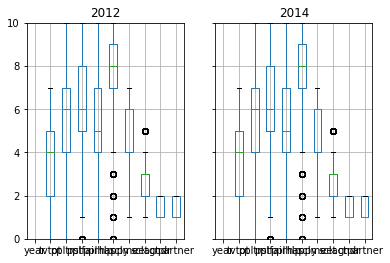

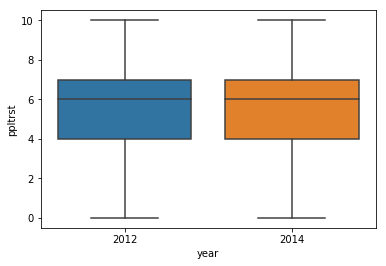

In [12]:
fig = ess_t.boxplot()
fig = plt.ylim(ymax=10, ymin=0)
plt.show()
ax = sns.boxplot(x='year', y='ppltrst', data=ess)
plt.show()

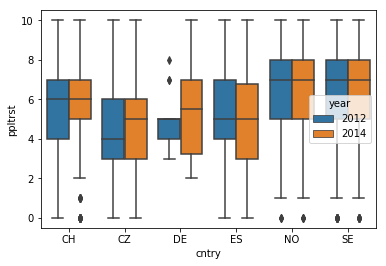

In [13]:
g = sns.boxplot(x='cntry', y='ppltrst', hue='year', data=ess)

## Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [26]:
# Kruskal-Wallace Test for happy
# join in list, then rank
happiness = pd.DataFrame()
happiness['12'] = ess_12['happy']
happiness['14'] = ess_14['happy']

ranks = stats.rankdata(happiness['12'].tolist() + happiness['14'].tolist())
happiness['ranks_12'] = ranks[0:4071]
happiness['ranks_14'] = ranks[4071:8142]

groups = ['ranks_12', 'ranks_14']
print(happiness[groups].apply(np.mean))

print(np.mean(ranks))

stats.kruskal(ess_14['happy'], ess_12['happy'])

ranks_12    2036.0
ranks_14    6107.0
dtype: float64
4071.5


KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)

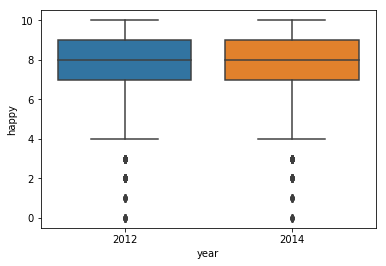

In [111]:
bx = sns.boxplot(x='year', y='happy', data=ess)

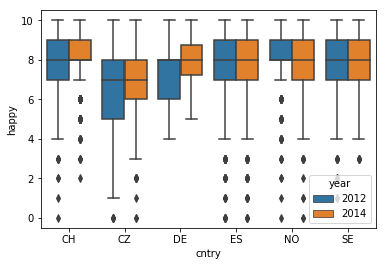

In [124]:
g = sns.boxplot(x='cntry', y='happy', hue='year', data=ess)

## Who reported watching more TV in 2012, men or women?

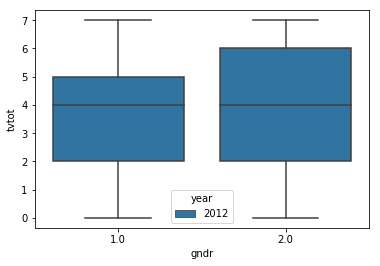

In [21]:
cx = sns.boxplot(x='gndr', y='tvtot', data=ess_12, hue='year')
# 1 is Male, 2 is Female

In [22]:
# Tukey HSD Test for tvtot
sex = np.asarray(ess_12['gndr'].tolist())
tv = np.asarray(ess_12['tvtot'].tolist())
tukey = pairwise_tukeyhsd(endog=tv, groups=sex, alpha=0.05)
tukey.summary()

group1,group2,meandiff,lower,upper,reject
1.0,2.0,0.0461,-0.0773,0.1696,False


## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

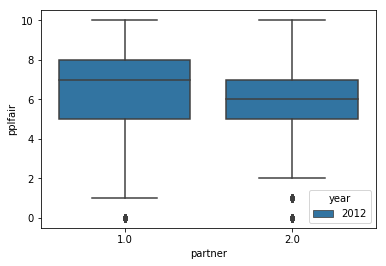

In [23]:
dx = sns.boxplot(x='partner', y='pplfair', data=ess_12, hue='year')

In [23]:
# Kruskal-Wallace Test for pplfair
# join in list, then rank

fairness = pd.DataFrame()
fairness['12'] = ess_12['pplfair']
fairness['14'] = ess_14['pplfair']

ranks_f = stats.rankdata(fairness['12'].tolist() + fairness['14'].tolist())
fairness['ranks_f12'] = ranks_f[0:4071]
fairness['ranks_f14'] = ranks_f[4071:8142]

groups = ['ranks_f12', 'ranks_f14']
print(fairness[groups].apply(np.mean))

print(np.mean(ranks_f))

stats.kruskal(ess_12['pplfair'], ess_14['pplfair'])

ranks_f12    2036.0
ranks_f14    6107.0
dtype: float64
4071.5


KruskalResult(statistic=0.1465597331626805, pvalue=0.7018449210497439)

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

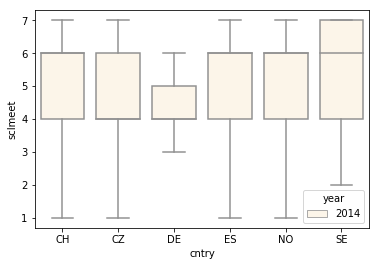

In [32]:
ex = sns.boxplot(x='cntry', y='sclmeet', data=ess_14, hue='year', color='orange')

In [24]:
# Kruskal-Wallace Test for sclmeet
# join in list, then rank

meet = pd.DataFrame()
meet['12'] = ess_12['sclmeet']
meet['14'] = ess_14['sclmeet']

ranks_m = stats.rankdata(meet['12'].tolist() + meet['14'].tolist())
meet['ranks_m12'] = ranks_m[0:4071]
meet['ranks_m14'] = ranks_m[4071:8142]

groups = ['ranks_m12', 'ranks_m14']
print(meet[groups].apply(np.mean))

print(np.mean(ranks_f))

stats.kruskal(ess_12['pplfair'], ess_14['sclmeet'])

ranks_m12    2036.0
ranks_m14    6107.0
dtype: float64
4071.5


KruskalResult(statistic=534.9049070191256, pvalue=2.4202982691413472e-118)

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

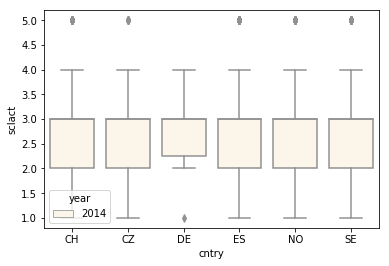

In [34]:
fx = sns.boxplot(x='cntry', y='sclact', data=ess_14, hue='year', color='orange')

In [35]:
# Tukey HSD Test for sclact
countries = np.asarray(ess_14['cntry'].tolist())
socact = np.asarray(ess_14['sclact'].tolist())
tukey = pairwise_tukeyhsd(endog=socact, groups=countries, alpha=0.05)
tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0553,-0.1935,0.0829,False
CH,DE,-0.0704,-0.7514,0.6107,False
CH,ES,-0.1533,-0.2724,-0.0341,True
CH,NO,0.0763,-0.0561,0.2087,False
CH,SE,0.0942,-0.032,0.2205,False
CZ,DE,-0.0151,-0.6976,0.6674,False
CZ,ES,-0.098,-0.225,0.0291,False
CZ,NO,0.1316,-0.008,0.2711,False
CZ,SE,0.1495,0.0158,0.2832,True
DE,ES,-0.0829,-0.7618,0.596,False
